**Week 9: Dimensionality Reduction via Principal Component Analysis**

Jannek Schaffert, Frédéric Sonak

This markdown was created with the assistance of ChatGPT, focusing on grammar, spelling, and readability.

**Background**

Principal Component Analysis (PCA) is a widely used technique for simplifying complex systems with many interrelated variables. It reduces the dimensionality of the data by focusing on the most significant components. This is achieved by analyzing the system’s correlation matrix, which captures the relationships between variables, derived from the system’s trajectory.

The matrix is decomposed into eigenvectors and eigenvalues, which are ranked in descending order of importance based on the magnitude of the eigenvalues. The first eigenvector accounts for the largest portion of the system’s variance, the second for a smaller portion, and so forth.

Typically, a few of the leading eigenvectors encapsulate the majority of the system’s variance, allowing for a more concise representation. This not only reduces computational complexity but also provides an effective way to retain the most meaningful features of the system while discarding redundant information.


**Task 1: Implementation**

In the first task a Monte Carlo method with Metropolis algorythm sampling a 2D energy surface was implemented. The energy surface is defined as:

$$
U(x, y) = k_B T \left( 0.28 \cdot 0.25 (a \cdot x + b \cdot y)^4 + 0.1 (a \cdot x + b \cdot y)^3 - 3.24 (a \cdot x + b \cdot y)^2 + 6.856 (a \cdot y - b \cdot x)^2 + 3.5 \right)
$$

with the constants set to
$$
a = 0.809 \text{ and } b = 0.588
$$



Importing all libraries used in this code.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

from numba import njit

import copy
import numpy as np
import scipy as scy

In [2]:
# Def the energy landscape function as given on the exercise sheet.
def energy_landscape(pos) -> float:
    return kb*T*(0.28*(0.25*(a*pos[0]+b*pos[1])**4
                       + 0.1*(a*pos[0]+b*pos[1])**3
                       - 3.24*(a*pos[0]+b*pos[1])**2
                       + 6.856*(a*pos[0]-b*pos[1])**2)+3.5)


In [3]:
#Def metropolis sampling function.

def metropolis(starting_position, samples, distance = 0.01):
    particle_pos = np.zeros((2,samples+1))
    particle_pos[:,0] = starting_position
    e1 = energy_landscape(starting_position)

    direction = np.zeros(2)
    for i in range(samples):
        angle = (np.random.rand() * 2 * np.pi)
        #print(angle)

        # calculate the coressponding velocities
        direction[0] = np.sin(angle) * distance
        direction[1] = np.cos(angle) * distance
        particle_pos[:,i+1] = particle_pos[:,i] + direction

        e2 = energy_landscape(particle_pos[:,i+1])
        if e2 > e1:
            logrando = np.log(np.random.rand())
            logp = -(e2-e1)/(kb*T)
            if logrando >= logp:
                particle_pos[:,i+1] -= direction
            else:
                e1 = e2
        else:
            e1 = e2
    return particle_pos


**Task 2: Simulation**

A simulation was conducted at a temperature of  T = 500 \, \text{K}  to investigate the given potential energy landscape. The simulation began at the initial coordinates  (x, y) = (2, 2) , and due to the properties of the energy landscape, the values of  x  and  y  naturally remained within the range of [-4, 4] throughout the process. The Monte Carlo (MC) step size was set to 0.01 to ensure precise sampling, and the simulation was carried out with 10,000,000 MC steps, including both accepted and rejected moves.

In [4]:
# Def constants

kb = 1.380e-23 # J/K
T = 500 #K

a = 0.809
b = 0.588

In [5]:
positions = metropolis(np.array([2,2]),10000000)

KeyboardInterrupt: 

In [24]:
positions

array([[2.        , 1.99035859, 1.99953182, ..., 0.60886288, 0.60368365,
        0.61292019],
       [2.        , 2.00265391, 1.99867247, ..., 0.96090034, 0.96945461,
        0.96562236]])

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.29292439, -3.22999437, -3.16706436, -3.10413435, -3.04120434,
        -2.97827432, -2.91534431, -2.8524143 , -2.78948429, -2.72655427,
        -2.66362426, -2.60069425, -2.53776423, -2.47483422, -2.41190421,
        -2.3489742 , -2.28604418, -2.22311417, -2.16018416, -2.09725415,
        -2.03432413, -1.97139412, -1.90846411, -1.8455341 , -1.78260408,
        -1.71967407, -1.65674406, -1.59381404, -1.53088403, -1.46795402,
        -1.40502401, -1.34209399, -1.27916398, -1.21623397, -1.15330396,
        -1.09037394, -1.02744393, -0.96451392, -0.90158391, -0.83865389,
        -0.77572388, -0.71279387, -0.64986386, -0.58693384, -0.52400383,
        -0.46107382, -0.3981438 , -0.33521379, -0.27228378, -0.20935377,
        -0.14642375, 

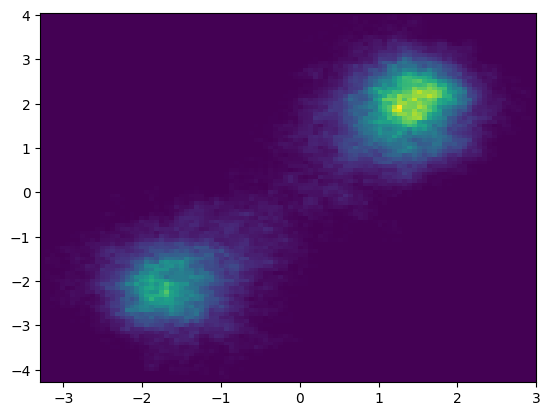

In [25]:
data, bins = np.histogram2d(positions[0],positions[1], bins=100)

As the hint on the sheet suggested we did clearly find two energy minima at approximately (2,1.5) and (-2,-1.5). Thus, the simulation does not need to be rerun with a larger step number.

To generate a dataset with sufficiently decorrelated data, every 100th data point from the MC trajectory was selected. This filtering process ensured that the resulting dataset contained independent points, eliminating dependence on previous data points.

In [27]:
undersampled = positions[:,::100]
undersampled.shape # print out the shape to verify its a set of 100,000 x,y points

(2, 100001)

In [35]:
p_x, x_edges, y_edges = np.histogram2d(undersampled[0],undersampled[1], bins = 100)

In [36]:
p_x = p_x/undersampled.shape[1]

**Task 3: Sampling**

A 2D histogram of the Data as well as the free Energy of the resulting sampling is plotted.

The free ernergy $\Delta G(x,y)$ is calculated via $\Delta G(x,y) = - k_BT\ln{(P(x,y))}$.

In [45]:
free_energy = np.where(p_x == 0, 0, -kb*T*np.log(p_x))
free_energy = -kb*T*np.log(p_x)

/tmp/ipykernel_1122/2957043948.py:1: RuntimeWarning: divide by zero encountered in log
  free_energy = np.where(p_x == 0, 0, -kb*T*np.log(p_x))
/tmp/ipykernel_1122/2957043948.py:2: RuntimeWarning: divide by zero encountered in log
  free_energy = -kb*T*np.log(p_x)


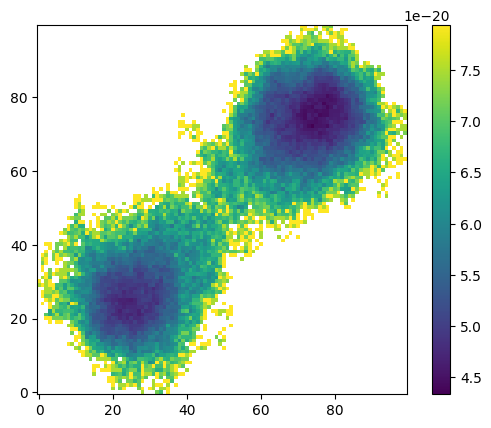

In [47]:
plt.imshow(free_energy, origin='lower')
plt.colorbar()

**Task 4: PCA**

From the simulated data, we calculated the means  $\langle x \rangle$, $\langle y \rangle$ as well as the variances  $\text{var}(x) = \langle (x - {\langle x \rangle})^2 \rangle$ and  $\text{var}(y) = \langle (y - \langle y \rangle)^2 \rangle$ .

Additionally, the covariances  $\text{cov}(x, y) = \text{cov}(y, x) = \langle (x - {\langle x \rangle})(y - {\langle y \rangle}) \rangle$ were computed from the dataset. Using these values, we constructed the covariance matrix  \sigma_{i,j} , which represents the relationships between  x  and  y .

Next, we diagonalized the covariance matrix  \sigma_{i,j}  to determine its eigenvectors  e_{\lambda,k}  and eigenvalues  \lambda_k , which describe the principal axes and magnitudes of variance in the data. For this step, built-in functions from NumPy were utilized to ensure efficiency and precision. These eigenvectors and eigenvalues provide a detailed understanding of the system’s behavior and are essential for further analysis.

In [87]:
# reshape to work with np.cov
undersampled = undersampled.reshape(100001,2)
# centering the data around the mean
meaned_data = np.mean(undersampled,axis=0)
centered_data = undersampled - meaned_data

covariance_matrix = np.cov(centered_data, rowvar=False)

In [80]:
eigenvalues, eigenvector = np.linalg.eig(covariance_matrix)

In [92]:
# sorts from smallest to biggest
indices = np.argsort(eigenvalues)

array([1, 0])